Using `ECOv002-CMR` package to retrieve ECOSTRESS granules as inputs using the Common Metadata Repository (CMR) API. Using `ECOv002-L3T-L4T-JET` package to run the product generating executable (PGE).

In [1]:
import numpy as np
from ECOv002_CMR import download_ECOSTRESS_granule
from ECOv003_L3T_L4T_JET import generate_L3T_L4T_JET_runconfig, L3T_L4T_JET

Disable logger output in notebook

In [2]:
import logging

logging.getLogger().handlers = []

Set working directory

In [3]:
working_directory = "~/data/ECOSTRESS"
static_directory = "~/data/L3T_L4T_static"

Retrieve LST LSTE granule from CMR API for target date

In [4]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=35698,
    scene=14,
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_LSTE_granule

L2TLSTE("/Users/gregoryhalverson/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01")

Load and display preview of surface temperature

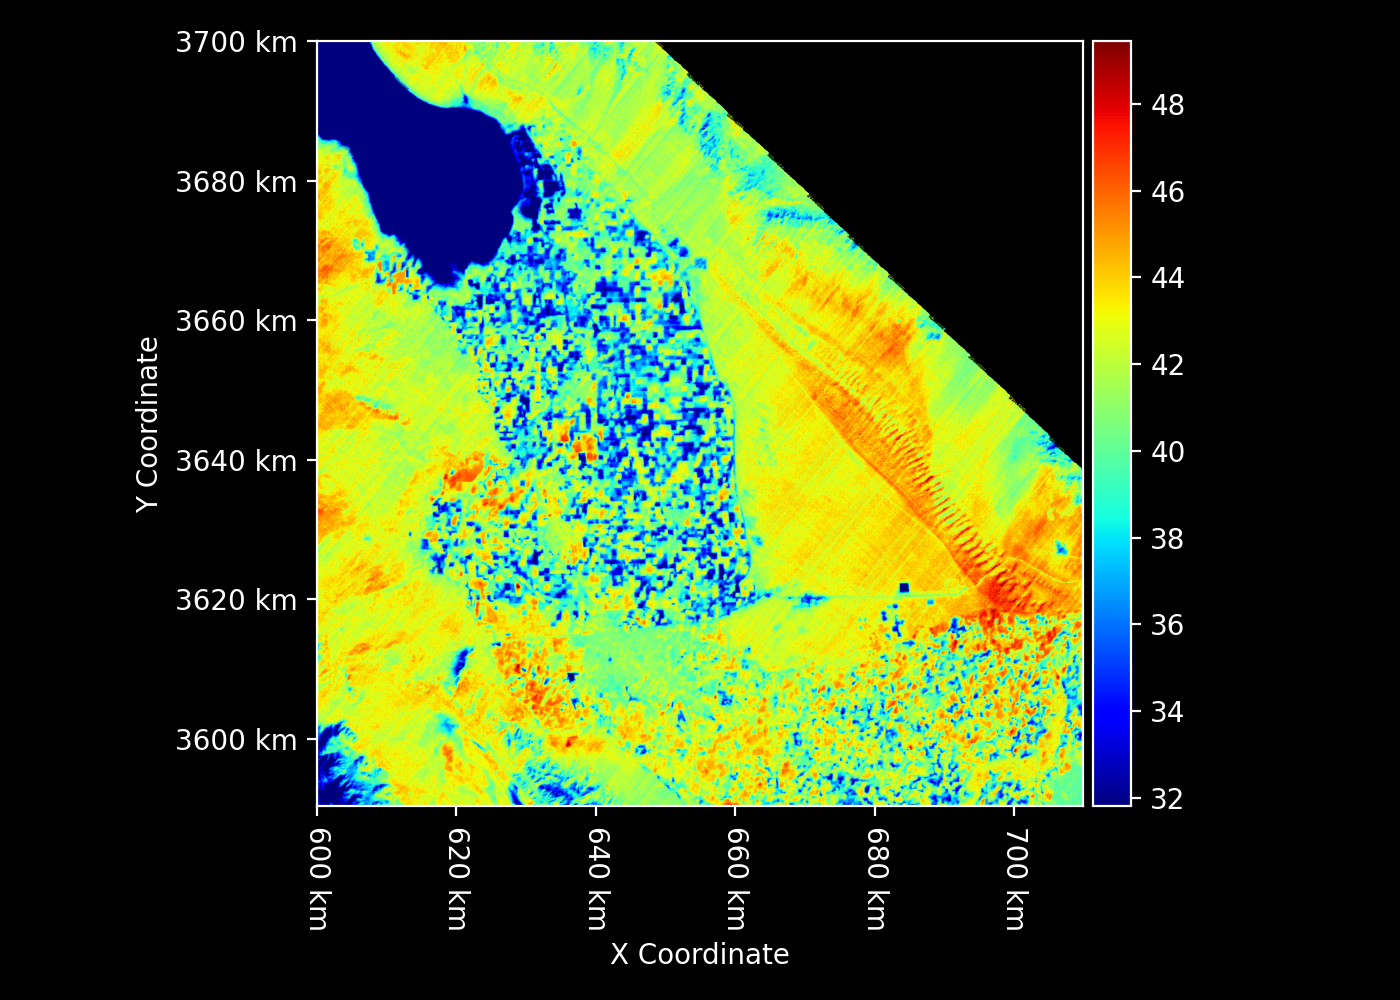

In [5]:
L2T_LSTE_granule.ST_C

Retrieve L2T STARS granule from CMR API as prior

In [6]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_STARS_granule

L2TSTARS("/Users/gregoryhalverson/data/ECOSTRESS/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

Load and display preview of vegetation index

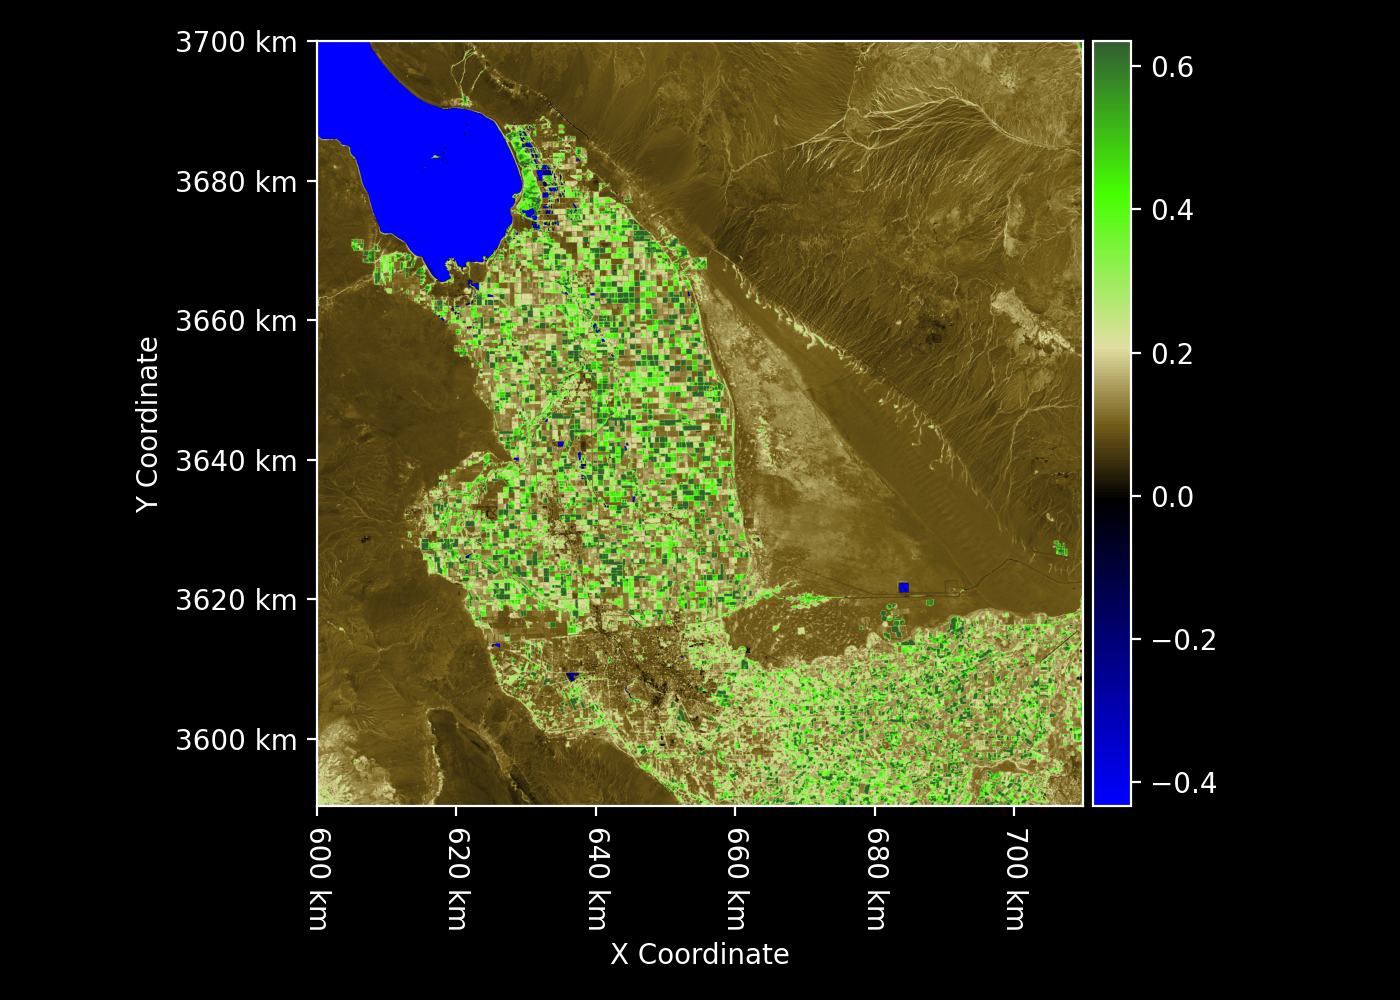

In [7]:
L2T_STARS_granule.NDVI

Generate XML run-config file for L3T L4T JET PGE run

In [8]:
runconfig_filename = generate_L3T_L4T_JET_runconfig(
    L2T_LSTE_filename=L2T_LSTE_granule.product_filename,
    L2T_STARS_filename=L2T_STARS_granule.product_filename,
    working_directory=working_directory,
    static_directory=static_directory
)

runconfig_filename

'/Users/gregoryhalverson/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml'

In [9]:
with open(runconfig_filename, "r") as f:
    print(f.read())

<?xml version="1.0" encoding="UTF-8"?>
<input xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xmlns:xalan="http://xml.apache.org/xslt"
       xmlns:cas="http://oodt.jpl.nasa.gov/1.0/cas"
       xsi:noNamespaceSchemaLocation="">
    <group name="LogMetadata">
        <vector name="CommandLineParameters">
            <element>L3T_L4T_JET</element>
            <element>/Users/gregoryhalverson/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml</element>
            <element>/Users/gregoryhalverson/data/ECOSTRESS/log/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.log</element>
        </vector>
    </group>
    <group name="JobIdentification">
        <scalar name="ProductionLocation">ECOSTRESS Science Computing Facility</scalar>
        <scalar name="TaskId">urn:ecostress:L2GL2TLSTETask</scalar>
        <scalar name="ProcessingNode">Mac.lan</scalar>
        <scalar name="ProductionDateTime">2025-08-18 21:32:26.283756</scalar>
        

In [10]:
exit_code = L3T_L4T_JET(runconfig_filename=runconfig_filename)
exit_code

[2025-08-18 14:32:26 INFO] started L3T L4T JET run at 2025-08-18 21:32:26.303171 UTC
[2025-08-18 14:32:26 INFO] L3T_L4T_JET PGE (1.7.3)
[2025-08-18 14:32:26 INFO] L3T_L4T_JET run-config: /Users/gregoryhalverson/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml
[2025-08-18 14:32:26 INFO] L3T JET granule ID: ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01
[2025-08-18 14:32:26 INFO] L3T JET granule directory: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01
[2025-08-18 14:32:26 INFO] L3T JET zip file: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.zip
[2025-08-18 14:32:26 INFO] L3T JET preview: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.png
[2025-08-18 14:32:26 INFO] L3T ETAUX granule directory: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_o

GEOS.fp.asm.inst3_2d_asm_Nx.20241022_2100.V01.nc4.20250818213228.download:   0%|          | 0.00/43.3M [00:00<…

[2025-08-18 14:33:07 INFO] GEOS-5 FP download completed: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.inst3_2d_asm_Nx.20241022_2100.V01.nc4 (45.41 MB) (38.99629112500406 seconds)
[2025-08-18 14:33:07 INFO] interpolating GEOS-5 FP inst3_2d_asm_Nx TQV from 2024-10-22 18:00 UTC and 2024-10-22 21:00 UTC to 2024-10-22 18:36 UTC


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[2025-08-18 14:33:08 INFO] GEOS-5 FP interpolation complete (0.30 seconds)
[2025-08-18 14:33:08 INFO] variable vapor_gccm on 2024-10-22 at 11SPS min: 0.768 mean: 1.109 max: 1.264 nan: 0.00% (nan)
[2025-08-18 14:33:08 INFO] generating GEOS5-FP ozone raster in grams per square centimeter
[2025-08-18 14:33:08 INFO] retrieving ozone_cm from GEOS-5 FP inst3_2d_asm_Nx TO3 for 2024-10-22 18:36 UTC
[2025-08-18 14:33:08 INFO] searching GEOS-5 FP inst3_2d_asm_Nx at 2024-10-22 18:36:27 UTC
[2025-08-18 14:33:08 INFO] interpolating GEOS-5 FP inst3_2d_asm_Nx TO3 from 2024-10-22 18:00 UTC and 2024-10-22 21:00 UTC to 2024-10-22 18:36 UTC
[2025-08-18 14:33:08 INFO] GEOS-5 FP interpolation complete (0.28 seconds)
[2025-08-18 14:33:08 INFO] variable ozone_cm on 2024-10-22 at 11SPS min: 0.266 mean: 0.268 max: 0.271 nan: 0.00% (nan)
[2025-08-18 14:33:08 INFO] running Forest Light Environmental Simulator for 11SPS at 2024-10-22 18:36:27 UTC
76832/76832 [==============================] - 20s 257us/step
[2025

/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/pyproj/transformer.py:817: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(


[2025-08-18 14:33:42 INFO] GEOS-5 FP interpolation complete (0.31 seconds)
[2025-08-18 14:33:42 INFO] retrieving SWin from GEOS-5 FP tavg1_2d_rad_Nx SWGNT for 2024-10-22 18:36 UTC
[2025-08-18 14:33:42 INFO] searching GEOS-5 FP tavg1_2d_rad_Nx at 2024-10-22 18:36:27 UTC
[2025-08-18 14:33:42 INFO] interpolating GEOS-5 FP tavg1_2d_rad_Nx SWGNT from 2024-10-22 18:30 UTC and 2024-10-22 19:30 UTC to 2024-10-22 18:36 UTC
[2025-08-18 14:33:42 INFO] GEOS-5 FP interpolation complete (0.04 seconds)
[2025-08-18 14:33:42 INFO] variable SWin_FLiES_ANN on 2024-10-22 at 11SPS min: 520.626 mean: 581.615 max: 645.835 nan: 12.50% (nan)
[2025-08-18 14:33:42 INFO] retrieving SWin from GEOS-5 FP tavg1_2d_rad_Nx SWGNT for 2024-10-22 18:36 UTC
[2025-08-18 14:33:42 INFO] searching GEOS-5 FP tavg1_2d_rad_Nx at 2024-10-22 18:36:27 UTC
[2025-08-18 14:33:42 INFO] interpolating GEOS-5 FP tavg1_2d_rad_Nx SWGNT from 2024-10-22 18:30 UTC and 2024-10-22 19:30 UTC to 2024-10-22 18:36 UTC
[2025-08-18 14:33:42 INFO] GEOS-

GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1830.V01.nc4.20250818213343.download:   0%|          | 0.00/71.0M [00:00<…

[2025-08-18 14:34:43 INFO] GEOS-5 FP download completed: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1830.V01.nc4 (74.43 MB) (59.49084812500223 seconds)


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[2025-08-18 14:34:43 INFO] downloading GEOS-5 FP: https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2024/M10/D22/GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1930.V01.nc4 -> /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1930.V01.nc4
[2025-08-18 14:34:43 INFO] downloading with requests: https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2024/M10/D22/GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1930.V01.nc4 -> /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1930.V01.nc4.20250818213443.download


GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1930.V01.nc4.20250818213443.download:   0%|          | 0.00/71.0M [00:00<…

[2025-08-18 14:35:19 INFO] GEOS-5 FP download completed: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_slv_Nx.20241022_1930.V01.nc4 (74.43 MB) (35.65299933399365 seconds)
[2025-08-18 14:35:19 INFO] interpolating GEOS-5 FP tavg1_2d_slv_Nx T2M from 2024-10-22 18:30 UTC and 2024-10-22 19:30 UTC to 2024-10-22 18:36 UTC
[2025-08-18 14:35:19 INFO] GEOS-5 FP interpolation complete (0.06 seconds)
[2025-08-18 14:35:19 INFO] variable Ta_C_coarse on 2024-10-22 at 11SPS min: 28.383 mean: 31.340 max: 32.825 nan: 0.00% (nan)
[2025-08-18 14:35:19 INFO] retrieving Ta from GEOS-5 FP tavg1_2d_slv_Nx T2M for 2024-10-22 18:36 UTC
[2025-08-18 14:35:19 INFO] searching GEOS-5 FP tavg1_2d_slv_Nx at 2024-10-22 18:36:27 UTC
[2025-08-18 14:35:19 INFO] interpolating GEOS-5 FP tavg1_2d_slv_Nx T2M from 2024-10-22 18:30 UTC and 2024-10-22 19:30 UTC to 2024-10-22 18:36 UTC
[2025-08-18 14:35:19 INFO] GEOS-5 FP interpolation complete (0.05 seconds)
[2025-08-

GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1830.V01.nc4.20250818213520.download:   0%|          | 0.00/31.9M [00:00<…

[2025-08-18 14:35:22 INFO] GEOS-5 FP download completed: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1830.V01.nc4 (33.43 MB) (2.295290375011973 seconds)


/opt/homebrew/Caskroom/miniforge/base/envs/ECOv003-L3T-L4T-JET/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[2025-08-18 14:35:22 INFO] downloading GEOS-5 FP: https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2024/M10/D22/GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1930.V01.nc4 -> /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1930.V01.nc4
[2025-08-18 14:35:22 INFO] downloading with requests: https://portal.nccs.nasa.gov/datashare/gmao/geos-fp/das/Y2024/M10/D22/GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1930.V01.nc4 -> /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1930.V01.nc4.20250818213522.download


GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1930.V01.nc4.20250818213522.download:   0%|          | 0.00/31.9M [00:00<…

[2025-08-18 14:35:25 INFO] GEOS-5 FP download completed: /Users/gregoryhalverson/data/ECOSTRESS/L3T_L4T_JET_sources/GEOS5FP_download/2024.10.22/GEOS.fp.asm.tavg1_2d_lnd_Nx.20241022_1930.V01.nc4 (33.44 MB) (2.1972135830001207 seconds)
[2025-08-18 14:35:25 INFO] interpolating GEOS-5 FP tavg1_2d_lnd_Nx SFMC from 2024-10-22 18:30 UTC and 2024-10-22 19:30 UTC to 2024-10-22 18:36 UTC
[2025-08-18 14:35:25 INFO] GEOS-5 FP interpolation complete (0.07 seconds)
[2025-08-18 14:35:25 INFO] variable SM_coarse on 2024-10-22 at 11SPS min: 0.005 mean: 0.025 max: 0.055 nan: 0.00% (nan)
[2025-08-18 14:35:25 INFO] air temperature regression: Ta_C = 24.36 + 0.21 * ST_C + 1.93 * NDVI + -10.51 * albedo
[2025-08-18 14:35:25 INFO] variable Ta_C_prediction on 2024-10-22 at 11SPS min: 25.428 mean: 31.338 max: 35.220 nan: 15.66% (nan)
[2025-08-18 14:35:25 INFO] up-sampling predicted air temperature from 70m to 13720m with average method
[2025-08-18 14:35:25 INFO] variable Ta_C_prediction_coarse on 2024-10-22 at 

Download completed: /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_AUS.tif.download
[2025-08-18 14:38:32 INFO] completed download in 182.07 seconds: /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_AUS.tif
/Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAFR.tif False
[2025-08-18 14:38:32 INFO] downloading: https://glad.geog.umd.edu/Potapov/Forest_height_2019/Forest_height_2019_NAFR.tif -> /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAFR.tif


Download completed: /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAFR.tif.download
[2025-08-18 14:41:13 INFO] completed download in 161.18 seconds: /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAFR.tif
/Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAM.tif False
[2025-08-18 14:41:13 INFO] downloading: https://glad.geog.umd.edu/Potapov/Forest_height_2019/Forest_height_2019_NAM.tif -> /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAM.tif


Download completed: /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAM.tif.download
[2025-08-18 14:53:04 INFO] completed download in 710.53 seconds: /Users/gregoryhalverson/data/L3T_L4T_static/GEDI_download/Forest_height_2019_NAM.tif


OSError: unable to download URL: https://glad.geog.umd.edu/Potapov/Forest_height_2019/Forest_height_2019_NAM.tif